# Intro to Classificacao de Imagens
Este material foi retirado do livro
```
Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow
by Aurélien Géron
2019
```

In [1]:
import pickle

import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.base import clone, BaseEstimator

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score

import matplotlib as mpl
import matplotlib.pyplot as plt

## MNIST

### Download dataset

In [2]:
# mnist = fetch_openml('mnist_784', version=1)

### Saving Dataset

In [3]:
# with open('mnist.pkl', 'wb') as bunch:
#     pickle.dump(mnist, bunch, protocol=pickle.HIGHEST_PROTOCOL)

### Loading Dataset

In [4]:
with open('mnist.pkl', 'rb') as bunch:
    mnist = pickle.load(bunch)

In [5]:
type(mnist)

sklearn.utils._bunch.Bunch

In [6]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [7]:
print(mnist)

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ..

In [8]:
for k, v in mnist.items():
    print(k)
    print(v)

data
       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ...  p

In [9]:
X, y = mnist['data'].to_numpy(), mnist['target'].to_numpy().astype('uint8')


In [10]:
chosen = 0

In [11]:
X[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [12]:
y[0]

5

In [13]:
def pretty_print_mnist_number(number: np.array):
    res = ''
    for linha in number.reshape(28, 28):
        for p in linha:
            res += f'{int(p):>3}'
        res += '\n'
    print(res)

In [14]:
pretty_print_mnist_number(X[chosen])

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

In [15]:
some_digit_image = X[chosen].reshape(28, 28)

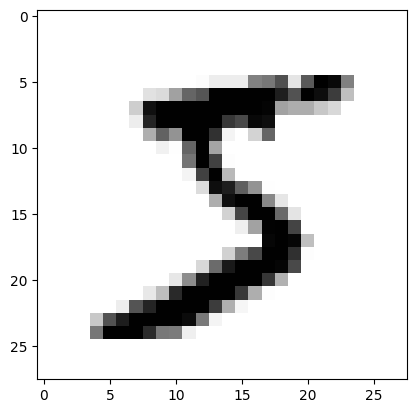

In [16]:
plt.imshow(some_digit_image, cmap='binary')

In [17]:
y = y.astype(np.uint8)

In [18]:
y[chosen]


5

### Treino e Teste
O database já está separado aleatoriamente e tem 70 mil amostras,
vamos pegar 60 mil para treino e 10 mil para teste



In [19]:
split_threshold = 60_000


In [20]:
X_train, X_test = X[:split_threshold], X[split_threshold:]
y_train, y_test = y[:split_threshold], y[split_threshold:]

In [21]:
pretty_print_mnist_number(X_train[0])

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

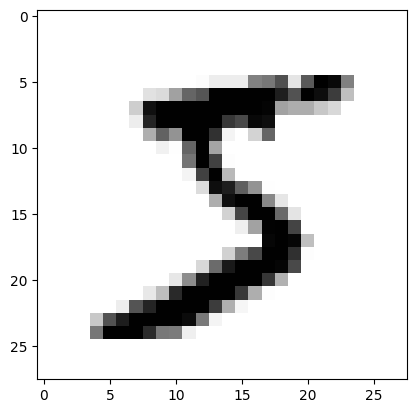

In [22]:
plt.imshow(X_train[0].reshape(28, 28), cmap='binary')

In [23]:
y_train[0]

5

## Treinando um classificador binário
Vamos teinar um classificador que verifica apenas se uma imagem
é o número 5 ou não



In [24]:
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

In [25]:
y_train_5[0]

True

In [26]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [27]:
n = 23
digitoX = X_test[n]

In [28]:
pretty_print_mnist_number(digitoX)

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 69152237254254255254252 52  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 87164237253254218138 83 39154254135  0  0  0
  0  0  0  0  0  0  0  0  0  0  0138246253254216167 54  5  0  0  0100191  3  0  0  0
  0  0  0  0  0  0  0  0  0  0  0233254169 53  6  0  0  0  0  0  0 35  8  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0174254 94  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 38245221 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0142254149  0  0  0  0  0  0  0  0  

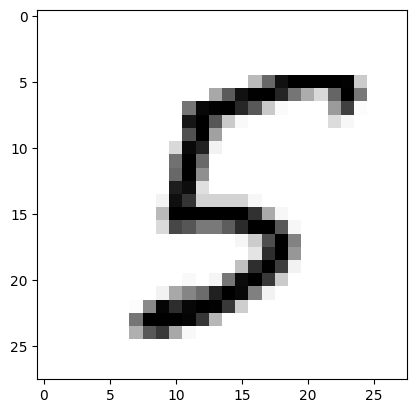

In [29]:
plt.imshow(digitoX.reshape(28, 28), cmap='binary')

In [30]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [32]:
y_test[n]

5

In [33]:
sgd_clf.predict([X_test[n]])

array([ True])

## Cross Validação
Vamos estudar as várias métricas para avaliar o método:
_**acurácia média**_, _**precision**_, _**recall**_ e _**f1**_.

### A acurácia média

In [34]:
def my_cross_val_score(clf, X_train: pd.array, y_train: pd.array):
    skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

    for train_index, test_index in skfolds.split(X_train, y_train):
        clone_cfl = clone(clf)
        X_train_folds = X_train[train_index]
        y_train_folds = y_train[train_index]
        X_test_folds = X_train[test_index]
        y_test_folds = y_train[test_index]

        clone_cfl.fit(X_train_folds, y_train_folds)
        y_pred = clone_cfl.predict(X_test_folds)
        n_correct = sum(y_pred == y_test_folds)
        print((n_correct/len(y_pred)))

In [35]:
my_cross_val_score(sgd_clf, X_train, y_train_5)

0.9669
0.91625
0.96785


In [36]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')


array([0.95035, 0.96035, 0.9604 ])

Uma média maior que 95%, mas será que é uma média boa?

Vamos fazer um método classificador que sempre diz que não é 5

In [37]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros(len(X), dtype=bool)

In [38]:
never_5_clf = Never5Classifier()

In [39]:
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')


array([0.91125, 0.90855, 0.90915])

In [40]:
my_cross_val_score(never_5_clf, X_train, y_train_5)


0.90965
0.90965
0.90965


Uma média de 90% de acerto,
perto do nosso método classificador inicial

## Confusion Matrix

A matriz de confusão nos diz quanto temos de
- verdadeiros positivos
- falsos positivos
- verdadeiros negativo
- falsos negativo

In [41]:
# este método nos retorna uma predição de todo o conjunto de treino
# por um classificador que não conhece a parte do cojunto de treino
# que ele está predizendo
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)


In [42]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

Neste matriz, a linha é a classe e a coluna é a predição

Começando pelo falso e depois pelo verdadeiro temos:
- verdadeiros positivos: 3530
- falsos positivos: 687
- verdadeiros negativo: 53892
- falsos negativo: 1891

Como seria um classificador perfeito?

In [43]:
y_train_perf_pred = y_train_5

In [44]:
confusion_matrix(y_train_5, y_train_perf_pred)

array([[54579,     0],
       [    0,  5421]])

Como seria o classificador que sempre diz não?

In [45]:
y_train_never5_pred = cross_val_predict(never_5_clf, X_train, y_train_5, cv=3)

In [46]:
confusion_matrix(y_train_5, y_train_never5_pred)



array([[54579,     0],
       [ 5421,     0]])

Agora vamos ver outros indíces de pontuação: precision, recall e f1


## Precision and Recall and F1

Precisão é dado pela equação TP/(TP+FP)

Quer dizer, dentro das vezes que o método disse sim,
a quantidade de vezes que ele acertou

Recall é dado pela equação TP/(TP+FN)

Quer dizer, sempre que o método olhou para o número 5,
essa foi a quantidade de vezes que ele acertou.

F1 é dado pela equação 2/((1/precision) + (1/recall))

Um balanceamento entre precision e recall

In [47]:
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [48]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [49]:
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [50]:
precision_score(y_train_5, y_train_perf_pred)

1.0

In [51]:
recall_score(y_train_5, y_train_perf_pred)

1.0

In [52]:
f1_score(y_train_5, y_train_perf_pred)

1.0

In [53]:
precision_score(y_train_5, y_train_never5_pred)

/home/vinicius/aulas/20222/pi/Unip222PI/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [54]:
recall_score(y_train_5, y_train_never5_pred)

0.0

In [55]:
f1_score(y_train_5, y_train_never5_pred)

0.0